In [3]:
from skimage.io import imread
from bokeh.charts import HeatMap, output_notebook
import numpy as np
import seaborn as sns
from pylab import *
%matplotlib inline

In [ ]:
img = imread("body.png")
data = {'fruit': ['apples']*3 + ['bananas']*3 + ['pears']*3,
        'fruit_count': [4, 5, 8, 1, 2, 4, 6, 5, 4],
        'sample': [1, 2, 3]*3}

hm = HeatMap(data, x='fruit', y='sample', values='fruit_count',
             title='Fruits', stat=None)

#output_file('heatmap.html')
output_notebook()
show(hm)

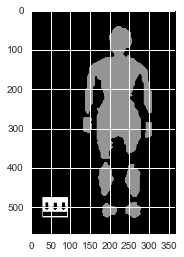

In [90]:
img = (imread("body.png"))

img[img < 0.25] = 0
img[img > 0.75] = 1
img[(img > 0.25) & (img < 0.75)] = 0.5

imshow(img)

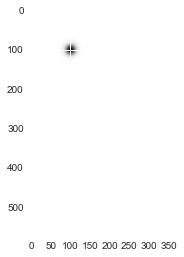

In [29]:
from skimage.filters import gaussian

heatmap = zeros((568,367))
heatmap[100,100] = 1
heatmap = gaussian(heatmap, 10)

imshow(heatmap)

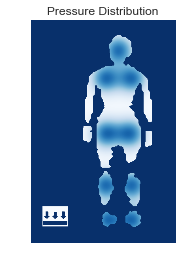

In [116]:
from skimage.io import imread
from bokeh.charts import HeatMap, output_notebook
import numpy as np
import seaborn as sns
from pylab import *
%matplotlib inline

def plot_heatmap(pressure_vals, sigma=25., shape=(568,367)):
    heatmap = zeros(shape)
    
    # map sensor to position in the heatmap
    positions = {"head" : (221,79),
                 "shoulder_left":(189,150),
                 "shoulder_right":(255,150),
                 "bottom_left" : (190,290),
                 "bottom_right" : (250,290),
                 "leg_left" : (188,421),
                 "leg_right" : (256,421),
                 "foot_left" : (194,509),
                 "foot_right" : (256, 509)
                }
    
    sensor2pos = {0 : ("head",),
                  1: ("shoulder_left", "shoulder_right"),
                  2: ("bottom_left","bottom_right"),
                  3: ("leg_left", "leg_right"),
                  4: ("foot_left", "foot_right"),
                  5: (),
                 }
    
    for i in sensor2pos.keys():
        for sensor in sensor2pos[i]:
            p = positions[sensor]
            newpos = zeros((568,367))
            newpos[p[1], p[0]] += 1
            heatmap += gaussian(newpos, sigma)     
            
    return np.float64(heatmap / heatmap.max())

def show_pressuremap():
    img = (imread("body.png"))

    img[img < 0.25] = 0
    img[img > 0.75] = 1
    img[(img > 0.25) & (img < 0.75)] = 0.5

    heat = 0.8 * (plot_heatmap(np.ones(6,)))
    #img[img == 1] = 0
    img[img == 0.5] = heat[img == 0.5]
    imshow(img, cmap="Blues")
    axis("off")
    title("Pressure Distribution")
    
show_pressuremap()